In [127]:
import pandas as pd
import numpy as np
import os
import rasterio

In [128]:
data = pd.read_csv('raw_data/nig_eth.csv')

In [129]:
data.shape

(1187, 5)

In [130]:
data["nightlights"].value_counts()


0.000000    785
5.248347      2
2.799490      1
4.511086      1
0.814623      1
           ... 
8.258038      1
1.089724      1
0.395529      1
0.076200      1
1.080100      1
Name: nightlights, Length: 402, dtype: int64

In [131]:
def drop_0s(df):
    """
    Elimina el 90% de las filas donde la columna 'nightlights' es igual a 0 de forma aleatoria.

    Args:
    df (pandas.DataFrame): DataFrame de entrada que contiene una columna 'nightlights'.

    Returns:
    pandas.DataFrame: DataFrame con el 90% de las filas con 'nightlights' igual a 0 eliminadas.
    """
    # Filtrar filas donde 'nightlights' es igual a 0
    zero_nightlights = df[df['nightlights'] == 0]
    
    # Calcular el número de filas a mantener (10% de las filas con 'nightlights' igual a 0)
    n_keep = int(0.2 * len(zero_nightlights))
    
    # Seleccionar aleatoriamente el 10% de las filas para mantener
    rows_to_keep = zero_nightlights.sample(n=n_keep, random_state=42)
    
    # Filtrar filas donde 'nightlights' no es igual a 0
    non_zero_nightlights = df[df['nightlights'] != 0]
    
    # Concatenar las filas no cero con las 10% de filas cero seleccionadas para mantener
    new_df = pd.concat([non_zero_nightlights, rows_to_keep])
    
    # Opcional: Reordenar el DataFrame final
    new_df = new_df.sample(frac=1).reset_index(drop=True)
    
    return new_df


In [147]:
new_data = drop_0s(data)
new_data

country  cluster_lat  cluster_lon    cons_pc  nightlights
0       eth     9.592166    41.888189  15.654187     2.505053
1        ng    10.254739     8.577945   4.720090     0.000000
2        ng     7.735629     6.754583   8.718739     1.519711
3       eth     7.692629    37.733616  11.271895     0.054588
4        ng     6.515467     3.332995  14.054602    13.914013
..      ...          ...          ...        ...          ...
554      ng     6.601064     3.307930   5.557623    13.523745
555     eth    12.801716    36.930314   4.027875     0.000000
556      ng     6.544336     3.341951   9.132466    15.683341
557      ng    11.506504     7.435587   1.727794     0.237309
558      ng     8.501869     4.549156   5.001412     3.500726

[559 rows x 5 columns]

In [148]:
def extract_subimage(src, lat, lon):
    """
    Extrae una sub-imagen de tamaño especificado alrededor de un punto central dado.
    
    Args:
    src (rasterio.io.DatasetReader): El objeto fuente abierto de Rasterio.
    lat (float): Latitud del centro de la sub-imagen.
    lon (float): Longitud del centro de la sub-imagen.
    km_per_pixel (float): Cuántos kilómetros representa un píxel.
    size_km (int): Tamaño de un lado de la sub-imagen cuadrada en kilómetros.
    
    Returns:
    np.ndarray: La sub-imagen extraída como una matriz de NumPy.
    """
    # Convertir coordenadas geográficas a coordenadas de píxel
    px, py = ~src.transform * (lon, lat)
    px, py = int(px), int(py)
    
    # Calcular el rango en píxeles para la sub-imagen
    km_per_pixel = 0.418877
    pixel_range = int(10 / km_per_pixel / 2)
    
    # Extraer la sub-imagen
    window = rasterio.windows.Window(px - pixel_range, py - pixel_range, 2 * pixel_range, 2 * pixel_range)
    sub_image = src.read(1, window=window)
    
    return sub_image



In [149]:
new_data

country  cluster_lat  cluster_lon    cons_pc  nightlights
0       eth     9.592166    41.888189  15.654187     2.505053
1        ng    10.254739     8.577945   4.720090     0.000000
2        ng     7.735629     6.754583   8.718739     1.519711
3       eth     7.692629    37.733616  11.271895     0.054588
4        ng     6.515467     3.332995  14.054602    13.914013
..      ...          ...          ...        ...          ...
554      ng     6.601064     3.307930   5.557623    13.523745
555     eth    12.801716    36.930314   4.027875     0.000000
556      ng     6.544336     3.341951   9.132466    15.683341
557      ng    11.506504     7.435587   1.727794     0.237309
558      ng     8.501869     4.549156   5.001412     3.500726

[559 rows x 5 columns]

In [150]:

import matplotlib.pyplot as plt
import rasterio
source = rasterio.open("raw_data/picture.tif")
X = []
for idx, row in new_data.iterrows():
    sub_image = extract_subimage(source, row['cluster_lat'], row['cluster_lon'])
    X.append(sub_image)

In [151]:
X

[array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ],
        [ 0.28631058,  0.27421382,  0.29067546,  0.38373652,  0.5640091 ,
          0.51561326,  0.31870085,  0.24820754,  0.22568826,  0.26151624,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ],
        [ 0.4267242 ,  0.36762795,  0.37316298,  0.5310496 ,  1.3624711 ,
          1.3234798 ,  0.549266  ,  0.3821134 ,  0.3559491 ,  0.3075788 ,
          0.25667137,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ],
    

In [152]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
X_tensor = tf.convert_to_tensor(X)
X_tensor = tf.expand_dims(X_tensor, axis=-1)
X_resized = tf.image.resize(X_tensor, [32,32]) 
X_resized

<tf.Tensor: shape=(559, 32, 32, 1), dtype=float32, numpy=
array([[[[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[1.52102500e-01],
         [1.48688480e-01],
         [1.47589117e-01],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[3.17026049e-01],
         [3.05137813e-01],
         [2.97726274e-01],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        ...,

        [[0.00000000e+00],
         [0.00000000e+00],
         [1.35263279e-02],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[0.00000000e+00],
         [0

In [153]:
X_resized.shape

TensorShape([559, 32, 32, 1])

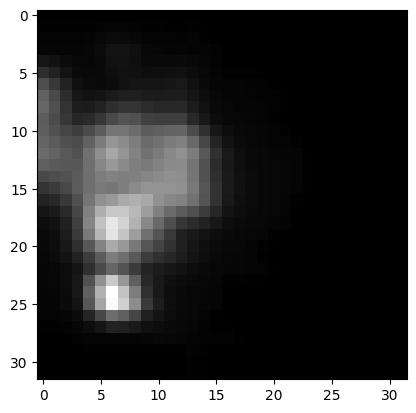

In [154]:
plt.imshow(X_resized[0], cmap='gray')

In [155]:

# # vmin, vmax = np.percentile(sub_image, [2,98]) 
# # plt.figure(figsize=(10, 10))  # Tamaño de la figura, ajustable según necesidad
# plt.imshow(X[0], cmap='gray')

In [156]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32, 3))

for layer in base_model.layers:
    layer.trainable = False
    
model = models.Sequential([
    base_model,
    # add CNN layers
    layers.Flatten(),
    layers.Dense(32*32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_10 (Flatten)        (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_10 (Dropout)        (None, 1024)              0         
                                                                 
 dense_23 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 15,241,025
Trainable params: 526,337
Non-trainable params: 14,714,688
_________________________________________________________________


In [157]:
# do a grid search for the best hyperparameters
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# model_wrapper = KerasRegressor(build_fn=model, verbose=0)


# params_grid ={
#     'epochs': [10, 20],
#     'batch_size': [32, 64],
#     'learning_rate': [0.1, 0.01]
# }
y = new_data['cons_pc']
X_rgb = tf.image.grayscale_to_rgb(X_resized)
X_bgr = X_rgb[..., ::-1]

X_train = X_bgr[:290]
y_train = y[:290]
X_test = X_bgr[290:]
y_test = y[290:]

# search = GridSearchCV(estimator=model_wrapper, param_grid=params_grid, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')

# search.fit(X_train, y_train)

In [158]:
# import preprocess_ input from keras.applications.vgg16
# from tensorflow.keras.applications.vgg16 import preprocess_input
# y = new_data['cons_pc']



In [159]:
# import early stopping
from tensorflow.keras.callbacks import EarlyStopping

model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2, callbacks=[EarlyStopping(patience=5)])

Epoch 1/30
15/15 [==============================] - 1s 63ms/step - loss: 6.9624 - mae: 6.9624 - val_loss: 5.7661 - val_mae: 5.7661
Epoch 2/30
15/15 [==============================] - 1s 48ms/step - loss: 8.1869 - mae: 8.1869 - val_loss: 5.0762 - val_mae: 5.0762
Epoch 3/30
15/15 [==============================] - 1s 48ms/step - loss: 4.9787 - mae: 4.9787 - val_loss: 4.6518 - val_mae: 4.6518
Epoch 4/30
15/15 [==============================] - 1s 42ms/step - loss: 6.4498 - mae: 6.4498 - val_loss: 5.0538 - val_mae: 5.0538
Epoch 5/30
15/15 [==============================] - 1s 42ms/step - loss: 4.3417 - mae: 4.3417 - val_loss: 4.9877 - val_mae: 4.9877
Epoch 6/30
15/15 [==============================] - 1s 45ms/step - loss: 4.2368 - mae: 4.2368 - val_loss: 5.3799 - val_mae: 5.3799
Epoch 7/30
15/15 [==============================] - 1s 42ms/step - loss: 6.5030 - mae: 6.5030 - val_loss: 4.7122 - val_mae: 4.7122
Epoch 8/30
15/15 [==============================] - 1s 41ms/step - loss: 4.1002 - m

In [160]:
score = model.evaluate(X_test, y_test)
score

9/9 [==============================] - 1s 60ms/step - loss: 5.0563 - mae: 5.0563


[5.056267261505127, 5.056267261505127]

In [161]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

9/9 [==============================] - 1s 58ms/step


-3.1746829978951068